In [30]:
import nltk
from nltk.tokenize import word_tokenize
import os

# Download NLTK data
nltk.download("punkt")

# Function to preprocess text (tokenization and lowercasing)
def preprocess_text(text):
    print("Tokenizing and Lowercasing...")
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [token.lower() for token in tokens]
    return tokens

# Load your human-translated and machine-translated texts from files
human_file_path = "C:\\Users\\jesse\\Desktop\\MT\\Mo_Yan\\Test_1.txt"
machine_file_path = "C:\\Users\\jesse\\Desktop\\MT\\Mo_Yan\\Test_2.txt"

# Read human text
with open(human_file_path, "r", encoding="utf-8") as human_file:
    human_translated_text = human_file.read()

# Read machine text
with open(machine_file_path, "r", encoding="utf-8") as machine_file:
    machine_translated_text = machine_file.read()

# Preprocess the texts
human_processed_text = preprocess_text(human_translated_text)
machine_processed_text = preprocess_text(machine_translated_text)

# Store the processed texts in separate files
output_directory = os.path.dirname(human_file_path)

# Write processed human text to a new file
human_processed_file_path = os.path.join(output_directory, "Test_1_processed.txt")
with open(human_processed_file_path, "w", encoding="utf-8") as human_processed_file:
    human_processed_file.write(" ".join(human_processed_text))

# Write processed machine text to a new file
machine_processed_file_path = os.path.join(output_directory, "Test_2_processed.txt")
with open(machine_processed_file_path, "w", encoding="utf-8") as machine_processed_file:
    machine_processed_file.write(" ".join(machine_processed_text))

print("Finished preprocessing and stored processed texts in files.")


Tokenizing and Lowercasing...
Tokenizing and Lowercasing...
Finished preprocessing and stored processed texts in files.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
import nltk
from nltk.corpus import stopwords
import string
import os

# Download NLTK data
nltk.download("stopwords")

# Function to remove stopwords and punctuation
def remove_stopwords_and_punctuation(tokens):
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]

    # Remove punctuation, single and double quotation marks
    tokens = [token for token in tokens if token not in string.punctuation + "‘’“”"]

    return tokens

# Function to read and preprocess text
def preprocess_and_save(input_file_path, output_file_path):
    # Read text
    with open(input_file_path, "r", encoding="utf-8") as file:
        text = file.read()

    # Tokenization and Lowercasing with preserving lines
    tokens = nltk.wordpunct_tokenize(text.lower())

    # Remove stopwords and punctuation
    processed_tokens = remove_stopwords_and_punctuation(tokens)

    # Write processed text back to the original file
    with open(output_file_path, "w", encoding="utf-8") as file:
        file.write(" ".join(processed_tokens))

# Load your human-translated and machine-translated processed texts from files
human_processed_file_path = "C:\\Users\\jesse\\Desktop\\MT\\Mo_Yan\\Test_1_processed.txt"
machine_processed_file_path = "C:\\Users\\jesse\\Desktop\\MT\\Mo_Yan\\Test_2_processed.txt"

# Preprocess and save human text (modifying the original file)
preprocess_and_save(human_processed_file_path, human_processed_file_path)

# Preprocess and save machine text (modifying the original file)
preprocess_and_save(machine_processed_file_path, machine_processed_file_path)

print("Finished preprocessing and stored final texts in the original files.")


Finished preprocessing and stored final texts in the original files.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import os

# Download NLTK data
nltk.download("stopwords")
nltk.download("wordnet")

# Function to lemmatize and remove stopwords and punctuation
def lemmatize_remove_stopwords_and_punctuation(tokens):
    lemmatizer = WordNetLemmatizer()

    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    return tokens

# Function to read and preprocess text using lemmatization
def preprocess_and_save_with_lemmatization(input_file_path, output_file_path):
    # Read text
    with open(input_file_path, "r", encoding="utf-8") as file:
        text = file.read()

    # Tokenization and Lowercasing
    tokens = nltk.word_tokenize(text.lower())

    # Lemmatize, remove stopwords, and punctuation
    processed_tokens = lemmatize_remove_stopwords_and_punctuation(tokens)

    # Write processed text back to the original file
    with open(output_file_path, "w", encoding="utf-8") as file:
        file.write(" ".join(processed_tokens))

# Load your human-translated and machine-translated processed texts from files
human_processed_file_path = "C:\\Users\\jesse\\Desktop\\MT\\Mo_Yan\\Test_1_processed.txt"
machine_processed_file_path = "C:\\Users\\jesse\\Desktop\\MT\\Mo_Yan\\Test_2_processed.txt"

# Preprocess and save human text (modifying the original file)
preprocess_and_save_with_lemmatization(human_processed_file_path, human_processed_file_path)

# Preprocess and save machine text (modifying the original file)
preprocess_and_save_with_lemmatization(machine_processed_file_path, machine_processed_file_path)

print("Finished preprocessing with lemmatization and stored final texts in the original files.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...


Finished preprocessing with lemmatization and stored final texts in the original files.


In [35]:
import nltk
from nltk.probability import FreqDist
import pandas as pd

# Function to compute word frequencies and save to CSV
def compute_and_save_word_frequencies(file_path, output_csv):
    # Read text
    with open(file_path, "r", encoding="utf-8") as file:
        text = file.read()

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Check if tokens are empty
    if not tokens:
        print(f"Tokens are empty for file: {file_path}")
        return

    # Compute word frequencies
    freq_dist = FreqDist(tokens)

    # Convert frequency distribution to a DataFrame
    freq_df = pd.DataFrame(list(freq_dist.items()), columns=['Word', 'Frequency'])

    # Save to CSV
    freq_df.to_csv(output_csv, index=False)
    print(f"Word frequencies saved to {output_csv}")

# Load your human-translated and machine-translated processed texts from files
human_processed_file_path = "C:\\Users\\jesse\\Desktop\\MT\\Mo_Yan\\Test_1_processed.txt"
machine_processed_file_path = "C:\\Users\\jesse\\Desktop\\MT\\Mo_Yan\\Test_2_processed.txt"

# Define output CSV paths
human_output_csv = "C:\\Users\\jesse\\Desktop\\MT\\Mo_Yan\\Test_1_word_frequencies.csv"
machine_output_csv = "C:\\Users\\jesse\\Desktop\\MT\\Mo_Yan\\Test_2_word_frequencies.csv"

# Compute and save word frequencies for human text
compute_and_save_word_frequencies(human_processed_file_path, human_output_csv)

# Compute and save word frequencies for machine text
compute_and_save_word_frequencies(machine_processed_file_path, machine_output_csv)


Word frequencies saved to C:\Users\jesse\Desktop\MT\Mo_Yan\Test_1_word_frequencies.csv
Word frequencies saved to C:\Users\jesse\Desktop\MT\Mo_Yan\Test_2_word_frequencies.csv


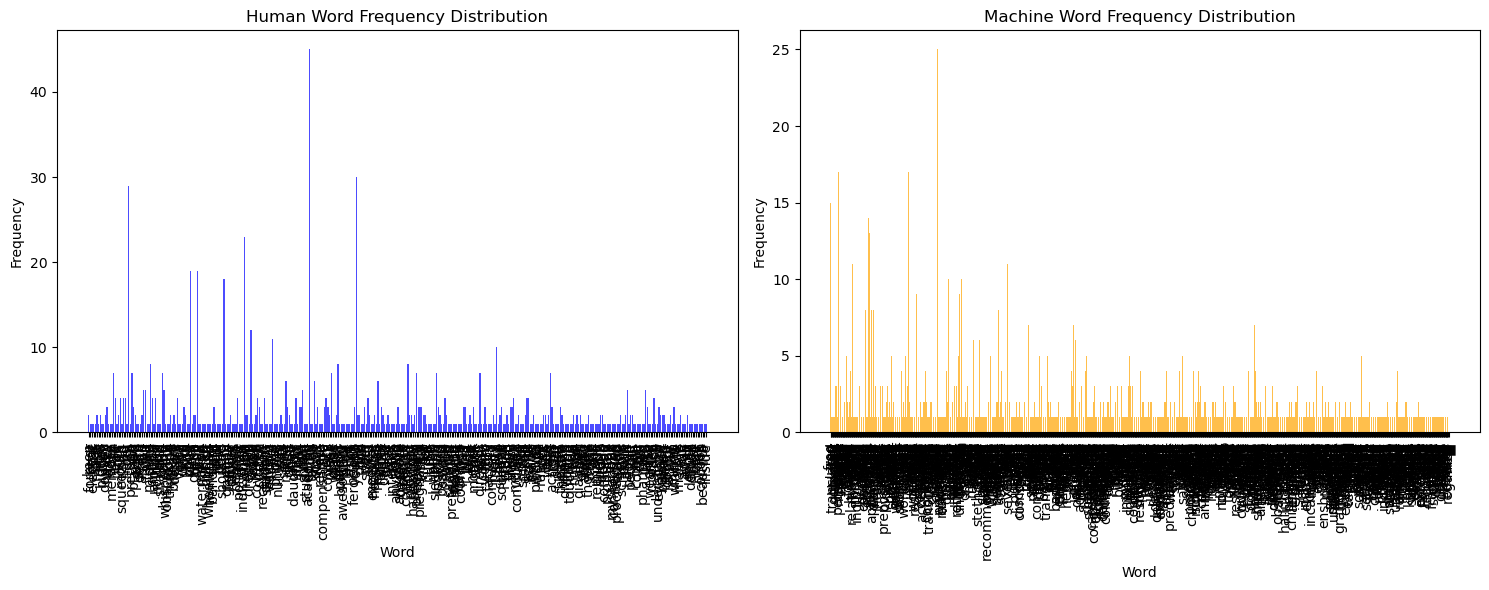

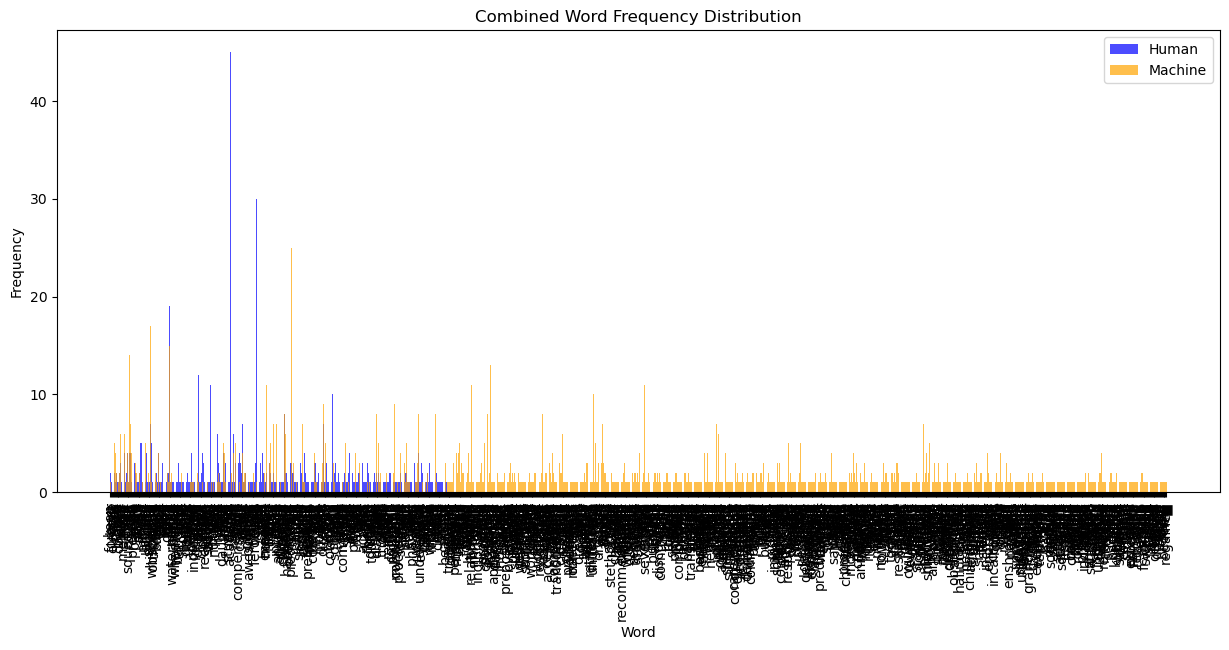

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File paths
human_output_csv = "C:\\Users\\jesse\\Desktop\\MT\\Mo_Yan\\Test_1_word_frequencies.csv"
machine_output_csv = "C:\\Users\\jesse\\Desktop\\MT\\Mo_Yan\\Test_2_word_frequencies.csv"

# Load word frequencies from CSV files
human_word_frequencies = pd.read_csv(human_output_csv)
machine_word_frequencies = pd.read_csv(machine_output_csv)

# Plot individual frequency distributions
plt.figure(figsize=(15, 6))

# Human
plt.subplot(1, 2, 1)
plt.bar(human_word_frequencies['Word'], human_word_frequencies['Frequency'], alpha=0.7, color='blue')
plt.title('Human Word Frequency Distribution')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Machine
plt.subplot(1, 2, 2)
plt.bar(machine_word_frequencies['Word'], machine_word_frequencies['Frequency'], alpha=0.7, color='orange')
plt.title('Machine Word Frequency Distribution')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Plot combined frequency distribution
combined_word_frequencies = pd.merge(human_word_frequencies, machine_word_frequencies, on='Word', how='outer', suffixes=('_human', '_machine'))
combined_word_frequencies = combined_word_frequencies.fillna(0)

plt.figure(figsize=(15, 6))
plt.bar(combined_word_frequencies['Word'], combined_word_frequencies['Frequency_human'], alpha=0.7, label='Human', color='blue')
plt.bar(combined_word_frequencies['Word'], combined_word_frequencies['Frequency_machine'], alpha=0.7, label='Machine', color='orange')
plt.title('Combined Word Frequency Distribution')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [48]:
from scipy.stats import entropy

# Function to compute KL Divergence with add-one smoothing
def kl_divergence_smoothed(p, q, epsilon=1e-5):
    # Apply add-one smoothing
    p_smoothed = (p + epsilon) / np.sum(p + epsilon)
    q_smoothed = (q + epsilon) / np.sum(q + epsilon)

    # KL Divergence calculation
    return entropy(p_smoothed, q_smoothed)

# Load word frequencies from CSV files
human_word_frequencies = pd.read_csv(human_output_csv)
machine_word_frequencies = pd.read_csv(machine_output_csv)

# Merge dataframes based on the 'Word' column
combined_word_frequencies = pd.merge(human_word_frequencies, machine_word_frequencies, on='Word', how='outer', suffixes=('_human', '_machine'))
combined_word_frequencies = combined_word_frequencies.fillna(0)

# Calculate KL Divergence with add-one smoothing
kl_score_smoothed = kl_divergence_smoothed(combined_word_frequencies['Frequency_human'], combined_word_frequencies['Frequency_machine'])
print(f"Smoothed KL Divergence Score: {kl_score_smoothed}")


Smoothed KL Divergence Score: 7.649142486019542
